<a href="https://colab.research.google.com/github/Nomadic43/Aerial-Image-Detection/blob/main/lulcResnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator 

In [ ]:
from pathlib import Path
data_dir = Path("/content/drive/MyDrive/dataset/AID")

/content/drive/MyDrive/dataset/AID/River/river_137.jpg


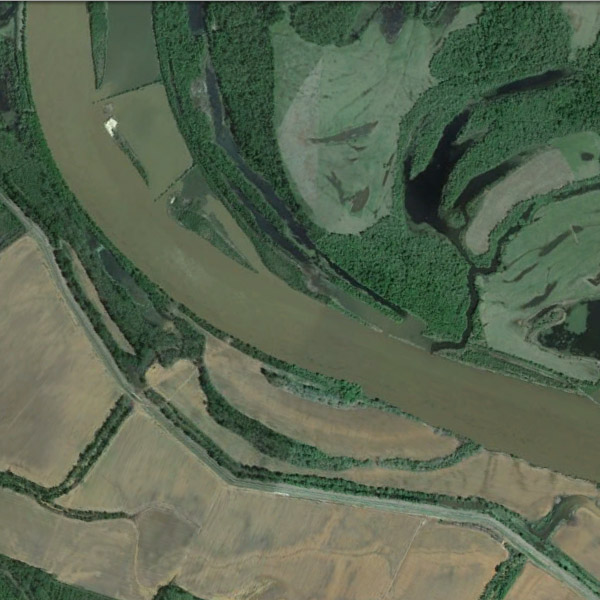

In [ ]:
img_eg = list(data_dir.glob('River/*'))
print(img_eg[0])
PIL.Image.open(str(img_eg[0]))

In [ ]:
#import cv2

#img_height,img_width=180,180
#batch_size=32

#img_test = list(data_dir.glob('River/*'))
#image_test =cv2.imread(str(img_test[0]))
#image_resized_test= cv2.resize(image_test, (img_height,img_width))
#image_test=np.expand_dims(image_resized_test,axis=0)
#print(image_test.shape)

(1, 180, 180, 3)


In [ ]:
#datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2, rescale=1.0/255, shear_range = 0.2, zoom_range = 0.2, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True)
#datagen_val = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255 , validation_split = 0.2)
#dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir, image_size=(img_height, img_width), batch_size=batch_size)

Found 3640 files belonging to 10 classes.


In [ ]:
img_height,img_width=180,180
batch_size=32
# train_ds = datagen.flow_from_directory(
# data_dir,
# validation_split=0.2,
# subset="training",
# seed=123,
# class_mode='categorical',
# target_size=(img_height, img_width),
# batch_size=32)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
   data_dir,
   validation_split=0.2,
   subset="training",
   seed=123,
   label_mode='categorical',
   image_size=(img_height, img_width),
   batch_size=32)

Found 3640 files belonging to 10 classes.
Using 2912 files for training.


In [ ]:
# val_ds = datagen_val.flow_from_directory(
#   data_dir,
#   # validation_split=0.2,
#   subset="validation",
#   seed=123,
#   class_mode='categorical',
#   target_size=(img_height, img_width),
#   batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3640 files belonging to 10 classes.
Using 728 files for validation.


In [ ]:
class_names= train_ds.class_names
print(class_names)

['Airport', 'Bridge', 'Commercial', 'DenseResidential', 'Forest', 'Industrial', 'Mountain', 'Parking', 'Port', 'River']


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='max',classes=10,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(10, activation='softmax'))

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=7)

Epoch 1/7
91/91 [==============================] - 1165s 12s/step - loss: 2.5612 - accuracy: 0.7627 - val_loss: 0.3488 - val_accuracy: 0.9025
Epoch 2/7
91/91 [==============================] - 20s 208ms/step - loss: 0.1895 - accuracy: 0.9440 - val_loss: 0.2497 - val_accuracy: 0.9299
Epoch 3/7
91/91 [==============================] - 20s 207ms/step - loss: 0.0867 - accuracy: 0.9694 - val_loss: 0.2230 - val_accuracy: 0.9409
Epoch 4/7
91/91 [==============================] - 20s 204ms/step - loss: 0.0359 - accuracy: 0.9876 - val_loss: 0.1581 - val_accuracy: 0.9547
Epoch 5/7
91/91 [==============================] - 20s 207ms/step - loss: 0.0221 - accuracy: 0.9921 - val_loss: 0.1591 - val_accuracy: 0.9533
Epoch 6/7
91/91 [==============================] - 20s 206ms/step - loss: 0.0189 - accuracy: 0.9918 - val_loss: 0.1846 - val_accuracy: 0.9464
Epoch 7/7
91/91 [==============================] - 24s 256ms/step - loss: 0.0118 - accuracy: 0.9955 - val_loss: 0.1610 - val_accuracy: 0.9547


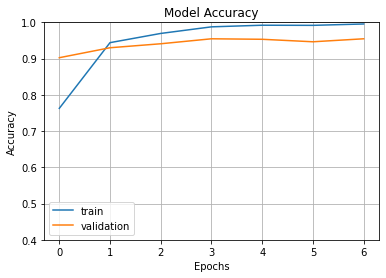

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

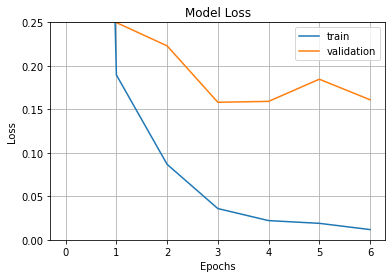

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0,ymax=0.25)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

/content/drive/MyDrive/dataset/AID/Port/port_120.jpg


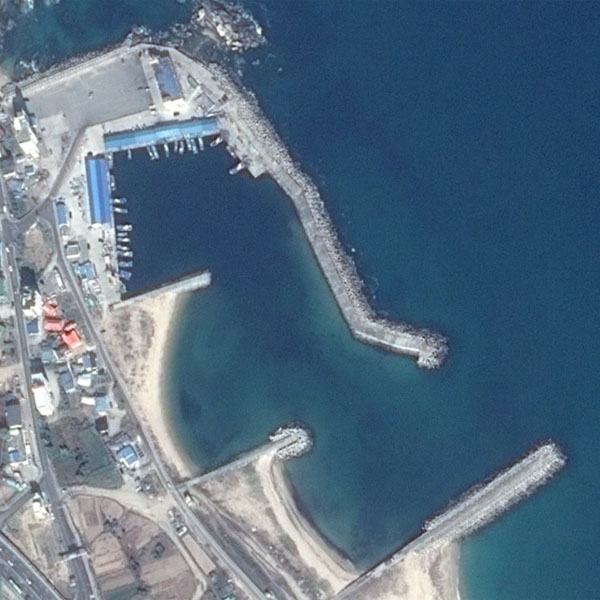

In [ ]:
import cv2
img_test = list(data_dir.glob('Port/*'))
image_test =cv2.imread(str(img_test[0]))
image_resized_test= cv2.resize(image_test, (img_height,img_width))
image_test=np.expand_dims(image_resized_test,axis=0)
print(img_test[0])
PIL.Image.open(str(img_test[0]))

In [ ]:
pred=resnet_model.predict(image_test)

1/1 [==============================] - 0s 21ms/step


In [ ]:
print(pred)

[[4.0492615e-08 3.6384611e-12 2.9038478e-14 2.7462158e-14 8.0595513e-13
  3.1214609e-09 4.7867136e-14 4.0419304e-12 1.0000000e+00 4.4588135e-11]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Port


In [ ]:
import cv2
outsideImg_test =cv2.imread('/content/drive/MyDrive/dataset/img.png')
resized_outsideImg_test= cv2.resize(outsideImg_test, (img_height,img_width))
outside_img_test=np.expand_dims(resized_outsideImg_test,axis=0)

In [ ]:
outsideImg_pred=resnet_model.predict(outside_img_test)
print(outsideImg_pred)

1/1 [==============================] - 0s 19ms/step
[[6.6807881e-15 4.7820452e-11 1.0592006e-13 9.1127663e-07 2.2162254e-09
  1.6934645e-06 4.8861692e-10 1.8357836e-10 3.0766365e-09 9.9999738e-01]]


In [ ]:
class_names= train_ds.class_names
print(class_names)

['Airport', 'Bridge', 'Commercial', 'DenseResidential', 'Forest', 'Industrial', 'Mountain', 'Parking', 'Port', 'River']


In [ ]:
output_class1=class_names[np.argmax(outsideImg_pred)]
print("The predicted class is", output_class1)

The predicted class is River


In [ ]:
import cv2
outsideImg_test =cv2.imread('/content/drive/MyDrive/dataset/img2.jpg')
resized_outsideImg_test= cv2.resize(outsideImg_test, (img_height,img_width))
outside_img_test=np.expand_dims(resized_outsideImg_test,axis=0)

In [ ]:
outsideImg_pred=resnet_model.predict(outside_img_test)
print(outsideImg_pred)

1/1 [==============================] - 0s 21ms/step
[[4.2717648e-08 5.6964206e-04 7.5053410e-03 6.7816217e-07 2.8617103e-07
  3.4906052e-06 1.0119138e-08 3.1680282e-04 9.9157751e-01 2.6225871e-05]]


In [ ]:
output_class1=class_names[np.argmax(outsideImg_pred)]
print("The predicted class is", output_class1)

The predicted class is Port
